## Step 1: Data Preprocessing
We need to load the images, preprocess them to a suitable format, and prepare them for the model.

In [10]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Define the path to your dataset
dataset_directory = 'DAGM_KaggleUpload'

# Setting up parameters
img_width, img_height = 150, 150  # or the dimensions that match your model requirements
batch_size = 32

# Initialize the data generator
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # using 20% of the data for validation
)

# Prepare training data generator
train_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'  # set as training data
)

# Prepare validation data generator
validation_generator = datagen.flow_from_directory(
    dataset_directory,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'  # set as validation data
)


Found 29120 images belonging to 11 classes.
Found 7280 images belonging to 11 classes.


## Step 2: Model Training

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)


# Importing Keras

In [ ]:
import keras

# SAving Model using Keras

In [ ]:
keras.saving.save_model(model, 'class1.keras')

# Loading the model

In [5]:
from tensorflow.keras.models import load_model

# Path to your saved model
model_path = r"class1.keras"
model = load_model(model_path)


c:\Users\Rupam Patil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


# Step 3: Model Evaluation


227/227 ━━━━━━━━━━━━━━━━━━━━ 72s 319ms/step - accuracy: 0.0724 - loss: -2697951945422798848.0000


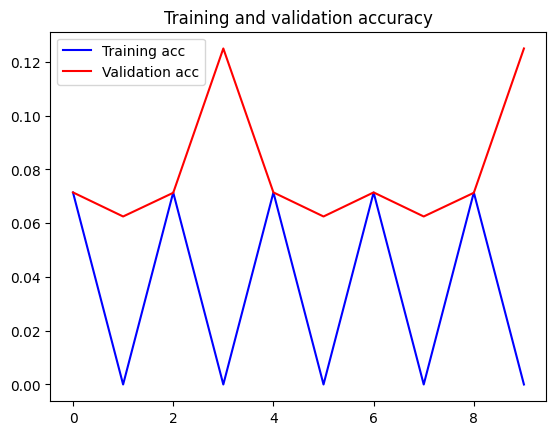

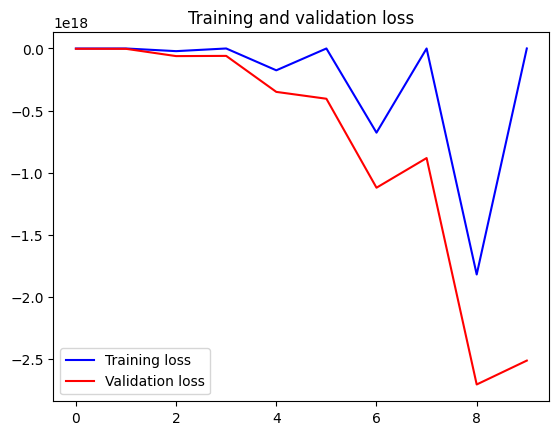

In [ ]:
# Evaluate the model on validation set
validation_generator.reset()
model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)



# Optionally, plot accuracy and loss over epochs
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()
